# Load numpy and all other packages required

In [1]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


The system cannot find the path specified.


# Parameters

In [131]:
NoParticles = 400;       # Number of particles in the system
xsize = 1024;            # Pixel size of the binary image in the x direction, no should be even
ysize = 1024;            # Pixel size of the binary image in the y direction, no should be even  
Binaryframewidth = 100;  # Frame around binary image without any cells
dt = 2;                  # Time step of the displacement
Particleradius = 5;      # Radius of the particles in the binary image before Gaussian Blurring and noise addition
Gaussianwidth = 3;       # Standard deviation for Gaussian kernel in px
Noise_std = 70;          # Standard deviation of the noise

# Create particles
Here, we generate N particles randomly and homogeneously distributed in the 2d space.

In [132]:
from numpy import random
Particles_Pos = random.rand(NoParticles,2)
Particles_Pos[:, 0] = (Particles_Pos[:,0] -0.5) * (xsize - 200) 
Particles_Pos[:, 1] = (Particles_Pos[:,1] -0.5) * (ysize - 200)

# Generate velocity field
Right now I use a field that attracts the cells to the point (0,0) with the potential V ~ x^2 + y^2. Change vx and vy for other types of displacements, for example rotation around (0,0). 

In [133]:
def velocityx(x, y):
  return -(20 * 2 / xsize) * x; # Alternatively one can use (20 * 2 / xsize) * y
def velocityy(x, y):
  return -(20 * 2 / ysize) * y; # Alternatively one can use -(20 * 2 / ysize) * x

# Displace particles
Here, we displace the cells with the velocity fields vx and vy.

In [134]:
import numpy as np
import matplotlib.pyplot as plt
# Velocities
vx = velocityx(Particles_Pos[:,0], Particles_Pos[:,1])
vy = velocityy(Particles_Pos[:,0], Particles_Pos[:,1])
# Apply velocity fields to particles
New_Particles_Pos = Particles_Pos * 0;
New_Particles_Pos[:,0] = Particles_Pos[:,0] + vx * dt
New_Particles_Pos[:,1] = Particles_Pos[:,1] + vy * dt

# Create displacement field figure
Here, I create an image of the displacement field.

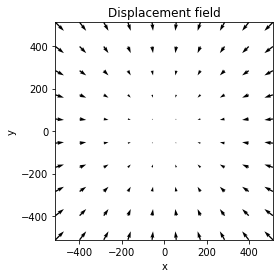

In [135]:
# Create Displacement field image
x,y = np.meshgrid(np.linspace(-xsize/2,xsize/2,10),np.linspace(-ysize/2,ysize/2,10))
vx = dt * velocityx(x,y)
vy = dt * velocityy(x,y)
fig = plt.figure()
ax = fig.add_subplot(111)
plt.quiver(x,y,vx,vy, angles='xy', scale_units='xy', scale=1)
ax.set_aspect('equal')
plt.xlim([-xsize/2, xsize/2])
plt.ylim([-ysize/2, ysize/2])
plt.title("Displacement field")
plt.xlabel("x")
plt.ylabel("y")
plt.savefig('DirectionalField.png', dpi=300)

# Figure particles before and after
Here, we create a image of the particles before (red) and after the particles are displaced by the velocity field.

(-512.0, 512.0)

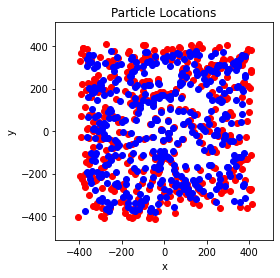

In [136]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
ax = fig.add_subplot(111)
plt.scatter(Particles_Pos[:,0], Particles_Pos[:,1], c='r')
plt.scatter(New_Particles_Pos[:,0], New_Particles_Pos[:,1], c='b')
plt.title("Particle Locations")
plt.xlabel("x")
plt.ylabel("y")
ax.set_aspect('equal')
plt.xlim([-xsize/2, xsize/2])
plt.ylim([-ysize/2, ysize/2])

# Create binary images before and after velocity field applied
Here, we initialize the zero arrays of size (xsize, ysize). Then, we find those pixel that are within a circle of radius "Particleradius", iterate over all particles and add the value 255 into those pixel within the circle.

In [137]:
xmax = np.max(np.concatenate([New_Particles_Pos[:,0], Particles_Pos[:,0]], axis=0))
xmin = np.min(np.concatenate([New_Particles_Pos[:,0], Particles_Pos[:,0]], axis=0))

ymax = np.max(np.concatenate([New_Particles_Pos[:,1], Particles_Pos[:,1]], axis=0))
ymin = np.min(np.concatenate([New_Particles_Pos[:,1], Particles_Pos[:,1]], axis=0))


deltax = np.ceil(xmax - xmin)
deltay = np.ceil(ymax - ymin)
print(deltax, deltay)

818.0 823.0


In [138]:
# Import
import matplotlib.pyplot as plt

# Initialise Arrays
Binary      = np.zeros((xsize,ysize), dtype=np.int) 
New_Binary  = np.zeros((xsize,ysize), dtype=np.int) 
# Prepare index array
y, x = np.ogrid[-Particleradius: Particleradius, -Particleradius: Particleradius]
index = x**2 + y**2 <= Particleradius**2
# Add particles to array for the initial binary image
for j in range(0, NoParticles):
    Centerx = int(Particles_Pos[j,0]+xsize/2)
    Centery = int(Particles_Pos[j,1]+ysize/2)
    Binary[Centery-Particleradius:Centery+Particleradius, Centerx-Particleradius:Centerx+Particleradius][index] = 255
# Add particles to array for the initial binary image
for j in range(0, NoParticles):
    Centerx = int(New_Particles_Pos[j,0]+xsize/2)
    Centery = int(New_Particles_Pos[j,1]+ysize/2)
    New_Binary[Centery-Particleradius:Centery+Particleradius, Centerx-Particleradius:Centerx+Particleradius][index] = 255

# Add static beads

We also need to add static beads below before adding the gaussian no


# Gaussian blur images
Here, we Gaussian Blur the images.

In [139]:
from scipy.ndimage.filters import gaussian_filter
Image_old = gaussian_filter(Binary, sigma=Gaussianwidth)
Image_new = gaussian_filter(New_Binary, sigma=Gaussianwidth)

# Add noise on top of binary images
Here, we add White noise on the data.

In [140]:
import random
for i in range(xsize): 
    for j in range(ysize):
        Noise=random.gauss(0, Noise_std)
        Image_old[i,j] = Image_old[i,j] + Noise
        
for i in range(xsize): 
    for j in range(ysize):
        Noise=random.gauss(0, Noise_std)
        Image_new[i,j] = Image_new[i,j] + Noise
        


# Show binary images before and after
Output the images before and after.

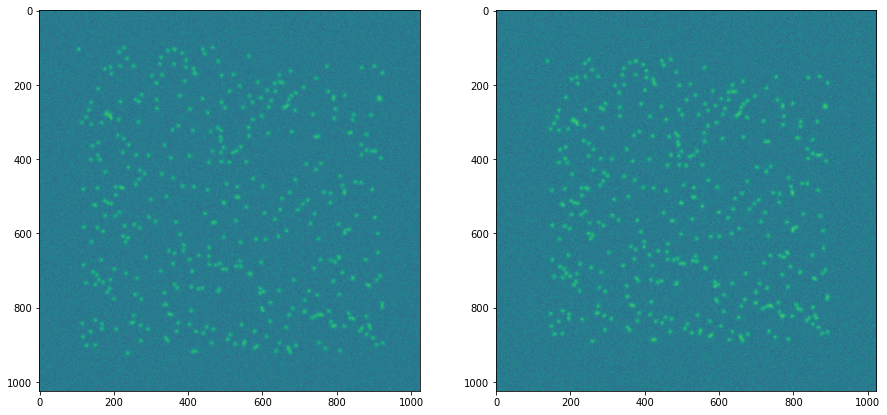

In [141]:
import matplotlib.pyplot as plt
import numpy as np
f, axarr = plt.subplots(1,2,figsize=(15,15))
axarr[0].imshow(Image_old)
axarr[1].imshow(Image_new)

# Save binary images to use them for PIV
Save the images so that they can be used by the TFM pipeline.

In [121]:
bead_ref = Image_old

In [122]:
bead_i = Image_new

In [123]:
img_dummy = np.zeros(bead_ref.shape, dtype=np.int32)

In [124]:
img = np.stack([[bead_i, img_dummy]])
ref = np.stack([bead_ref, img_dummy])

In [125]:
import numpy as np
from skimage import io
import matplotlib.pyplot as plt

from pytraction.core import TractionForce
from pytraction.utils import plot

# save images to disk
io.imsave('../data/sim/tfm.tif', img)
io.imsave('../data/sim/tfm-ref.tif', ref)

<ipython-input-125-5e576c8b61f8>:9: UserWarning: ../data/sim/tfm.tif is a low contrast image
  io.imsave('../data/sim/tfm.tif', img)
<ipython-input-125-5e576c8b61f8>:10: UserWarning: ../data/sim/tfm-ref.tif is a low contrast image
  io.imsave('../data/sim/tfm-ref.tif', ref)


In [126]:
pix_per_mu = 1.3 # The number of pixels per micron 
E = 100 # Youngs modulus in Pa

img_path = '../data/sim/tfm.tif'
ref_path = '../data/sim/tfm-ref.tif'

In [127]:
traction_obj = TractionForce(pix_per_mu, E=E) # config TractionForce object
img, ref, _ = traction_obj.load_data(img_path, ref_path) # we can load the dat using the load_data method


In [128]:
log1 = traction_obj.process_stack(img, ref, verbose=1)

Processing stacks


C:\Users\ryan\miniconda3\envs\pytraction\lib\site-packages\pytraction\utils.py:46: RuntimeWarning: invalid value encountered in true_divide
  x = (x - np.min(x)) / (np.max(x) - np.min(x))
C:\Users\ryan\miniconda3\envs\pytraction\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:318: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)
C:\Users\ryan\miniconda3\envs\pytraction\lib\site-packages\scipy\optimize\optimize.py:1971: ComplexWarning: Casting complex values to real discards the imaginary part
  print("%5.0f   %12.6g %12.6g %s" % (fmin_data + (step,)))
C:\Users\ryan\miniconda3\envs\pytraction\lib\site-packages\scipy\optimize\optimize.py:2015: ComplexWarning: Casting complex values to real discards the imaginary part
  print("%5.0f   %12.6g %12.6g %s" % (fmin_data + (step,)))


In [129]:
log1

,frame,traction_map,force_field,stack_bead_roi,cell_roi,mask_roi,beta,L,pos,vec,img_path,ref_path,E,s
0,0,"[[1.7334556185088505, 2.2306608129820744, 1.94...","[[[-0.28245004884001323, 2.5080068944991174], ...","[[[126, 139, 115, 133, 149, 85, 99, 144, 92, 9...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",None,0.396639,2209.268139+0.000000j,"[[16.0, 32.0, 48.0, 64.0, 80.0, 96.0, 112.0, 1...","[[2.725703239440918, 2.0803754329681396, 1.130...",../data/sim/tfm.tif,../data/sim/tfm-ref.tif,100,0.5


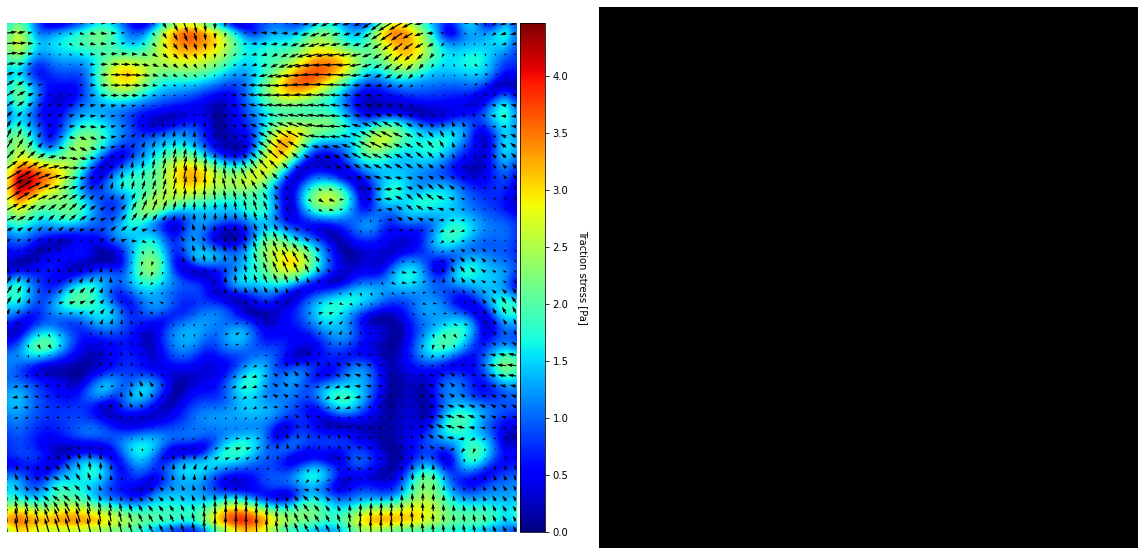

In [130]:
for frame in range(len(log1)):
    plot(log1, frame=frame)